# 场景:比较同一阈值算法的不同实现
在本笔记本中,我们将比较同一算法的不同实现。作为示例,我们选择Otsu二值化阈值方法与[连通组件标记](https://en.wikipedia.org/wiki/Connected-component_labeling)相结合。该算法发表于40多年前,人们可能会认为这种算法的所有常见实现都会显示相同的结果。

## 另请参阅
* [从灰度直方图选择阈值的方法 (N. Otsu 1979)](https://ieeexplore.ieee.org/document/4310076)

In [1]:
from skimage.io import imread, imshow, imsave
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.color import label2rgb

## 实现1: ImageJ

作为第一个实现,我们来看看[ImageJ](https://imagej.nih.gov/ij/index.html)。我们将它作为[Fiji发行版](https://fiji.sc/)的一部分使用。以下[ImageJ宏](https://imagej.nih.gov/ij/developer/macro/macros.html)代码打开"blobs.tif",使用Otsu方法对其进行阈值处理,并应用连通组件标记。结果标记图像被保存到磁盘。您可以通过单击`File > New > Script`在Fiji的脚本编辑器中执行此脚本。

**注意:** 执行此脚本时,您应该调整图像数据的路径,以便它可以在您的计算机上运行。

In [2]:
with open('blobs_segmentation_imagej.ijm') as f:
    print(f.read())

open("C:/structure/code/clesperanto_SIMposium/blobs.tif");

// binarization
setAutoThreshold("Otsu dark");
setOption("BlackBackground", true);
run("Convert to Mask");

// Connected component labeling + measurement
run("Analyze Particles...", "  show=[Count Masks] ");

// Result visualization
run("glasbey on dark");

// Save results
saveAs("Tiff", "C:/structure/code/clesperanto_SIMposium/blobs_labels_imagej.tif");



结果看起来是这样的:

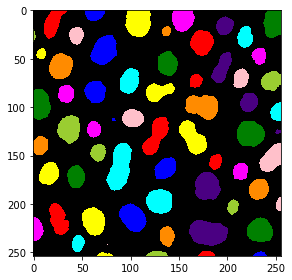

In [3]:
imagej_label_image = imread("blobs_labels_imagej.tif")
visualization = label2rgb(imagej_label_image, bg_label=0)
imshow(visualization)

## 实现2: scikit-image
作为第二个实现,我们将使用[scikit-image](https://scikit-image.org/)。由于它可以从jupyter笔记本中使用,我们也可以再次仔细查看工作流程。

我们首先加载并可视化原始blob图像。

C:\Users\rober\miniconda3\envs\bio_39\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


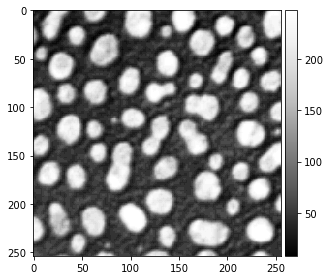

In [4]:
blobs_image = imread("blobs.tif")
imshow(blobs_image, cmap="Greys_r")

然后使用[`threshold_otsu`方法](https://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=threshold%20otsu#skimage.filters.threshold_otsu)对图像进行二值化。

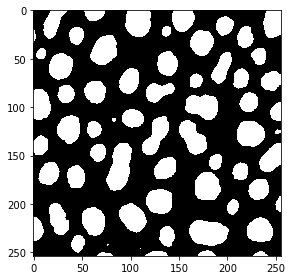

In [5]:
# determine threshold
threshold = threshold_otsu(blobs_image)

# apply threshold
binary_image = blobs_image > threshold

imshow(binary_image)

对于连通组件标记,我们使用[`label`方法](https://scikit-image.org/docs/dev/api/skimage.measure.html?highlight=label#skimage.measure.label)。标记图像的可视化是使用[`` method]()产生的。

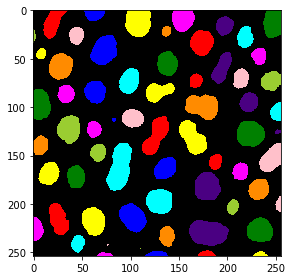

In [6]:
# connected component labeling
skimage_label_image = label(binary_image)

# visualize it in colours
visualization = label2rgb(skimage_label_image, bg_label=0)
imshow(visualization)

为了稍后比较图像,我们还将这个图像保存到磁盘。

In [7]:
imsave("blobs_labels_skimage.tif", skimage_label_image)

C:\Users\rober\AppData\Local\Temp\ipykernel_6744\179771585.py:1: UserWarning: blobs_labels_skimage.tif is a low contrast image
  imsave("blobs_labels_skimage.tif", skimage_label_image)


## 实现3: clesperanto / python
同一工作流程的第三个实现也从python运行,并使用[pyclesperanto](https://github.com/clEsperanto/pyclesperanto_prototype)。

**注意:** 执行此脚本时,您应该调整图像数据的路径,以便它可以在您的计算机上运行。

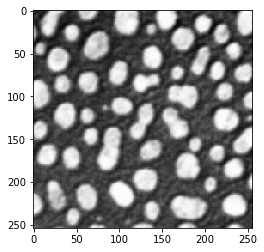

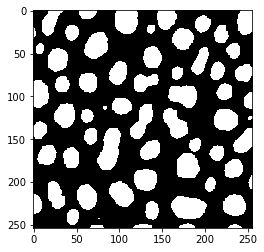

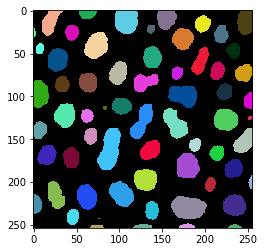

In [8]:
import pyclesperanto_prototype as cle

blobs_image = cle.imread("C:/structure/code/clesperanto_SIMposium/blobs.tif")

cle.imshow(blobs_image, "Blobs", False, 0, 255)

# Threshold Otsu
binary_image = cle.create_like(blobs_image)
cle.threshold_otsu(blobs_image, binary_image)

cle.imshow(binary_image, "Threshold Otsu of CLIJ2 Image of blobs.gif", False, 0.0, 1.0)

# Connected Components Labeling Box
label_image = cle.create_like(binary_image)
cle.connected_components_labeling_box(binary_image, label_image)

cle.imshow(label_image, "Connected Components Labeling Box of Threshold Otsu of CLIJ2 Image of blobs.gif", True, 0.0, 64.0)

我们也将保存这个图像以便稍后比较。

In [9]:
imsave("blobs_labels_clesperanto_python.tif", label_image)

## 实现4: clesperanto / Jython

第四个实现在Fiji中使用clesperanto。要在Fiji中运行此脚本,请在您的Fiji中激活clij、[clij2](https://clij.github.io/)和[clijx-assistant](https://clij.github.io/clijx-assistant/)更新站点。您可能会注意到此脚本与上面的脚本相同。只有保存结果的工作方式不同。

**注意:** 执行此脚本时,您应该调整图像数据的路径,以便它可以在您的计算机上运行。

In [10]:
with open('blobs_segmentation_clesperanto.py') as f:
    print(f.read())

# To make this script run in Fiji, please activate the clij, clij2
# and clijx-assistant update sites in your Fiji. 
# Read more: 
# https://clij.github.io/
# 
# To make this script run in python, install pyclesperanto_prototype:
# conda install -c conda-forge pyopencl
# pip install pyclesperanto_prototype
# Read more: 
# https://clesperanto.net
# 
import pyclesperanto_prototype as cle

blobs_image = cle.imread("C:/structure/code/clesperanto_SIMposium/blobs.tif")

cle.imshow(blobs_image, "Blobs", False, 0, 255)

# Threshold Otsu
binary_image = cle.create_like(blobs_image)
cle.threshold_otsu(blobs_image, binary_image)

cle.imshow(binary_image, "Threshold Otsu of CLIJ2 Image of blobs.gif", False, 0.0, 1.0)

# Connected Components Labeling Box
label_image = cle.create_like(binary_image)
cle.connected_components_labeling_box(binary_image, label_image)

cle.imshow(label_image, "Connected Components Labeling Box of Threshold Otsu of CLIJ2 Image of blobs.gif", True, 0.0, 64.0)

# The followin

我们也来看看这个工作流程的结果:

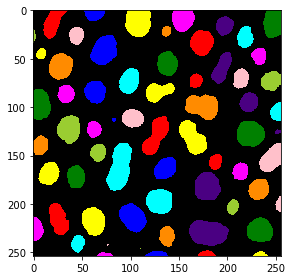

In [11]:
imagej_label_image = imread("blobs_labels_clesperanto_imagej.tif")
visualization = label2rgb(imagej_label_image, bg_label=0)
imshow(visualization)